In [ ]:
import tensorflow as tf
import keras as ks
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection

In [ ]:
data=pd.read_csv('/content/NFLX.csv').round(2)

In [ ]:
puredata=pd.read_csv('/content/NFLX.csv').round(2)

In [ ]:
data=data.sample(frac=1).dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Interest,Currency,Inflation,Day,Month
4926,2021-12-16,597.09,602.83,588.00,591.06,591.06,3143200.0,1.47,0.75,7.0,16,12
3315,2015-07-27,107.79,109.86,106.25,106.43,106.43,11302600.0,2.32,0.64,0.2,27,7
374,2003-11-17,3.31,3.31,3.16,3.19,3.19,31721200.0,4.30,0.59,1.8,17,11
4623,2020-10-05,506.80,520.99,501.70,520.65,520.65,4088100.0,0.79,0.77,1.2,5,10
3629,2016-10-21,122.50,127.85,122.31,127.50,127.50,18832400.0,1.76,0.81,1.6,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2009-05-08,5.72,5.80,5.40,5.75,5.75,24913000.0,3.29,0.65,-1.3,8,5
2604,2012-09-25,8.11,8.14,7.67,7.69,7.69,41858600.0,1.72,0.62,2.0,25,9
73,2002-09-09,0.92,0.92,0.89,0.90,0.90,1419600.0,3.87,0.64,1.5,9,9
1982,2010-04-09,11.58,11.79,11.49,11.77,11.77,11563300.0,3.85,0.65,2.2,9,4


In [ ]:
train=data.iloc[:int(0.8*len(data))]
test=data.iloc[int(0.8*len(data)):]

In [ ]:
test.to_csv('testing_dataset.csv')
train.to_csv('training_dataset.csv')

In [ ]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Interest,Currency,Inflation,Day,Month
1347,2007-10-01,2.96,3.06,2.94,3.03,3.03,9528400.0,4.53,0.49,3.5,1,10
4876,2021-10-06,628.18,639.87,626.36,639.10,639.10,4580400.0,1.58,0.73,6.2,6,10
2774,2013-06-03,32.44,32.50,31.08,31.71,31.71,21270900.0,2.30,0.65,1.8,3,6
1677,2009-01-22,4.26,4.47,4.21,4.41,4.41,7172900.0,2.52,0.69,0.0,22,1
2827,2013-08-16,36.17,37.16,35.88,36.98,36.98,21354200.0,2.74,0.64,1.5,16,8


In [ ]:
X=train.iloc[:,[1,2,3,7,8,9,10,11]]
X.head()

,Open,High,Low,Interest,Currency,Inflation,Day,Month
4926,597.09,602.83,588.00,1.47,0.75,7.0,16,12
3315,107.79,109.86,106.25,2.32,0.64,0.2,27,7
374,3.31,3.31,3.16,4.30,0.59,1.8,17,11
4623,506.80,520.99,501.70,0.79,0.77,1.2,5,10
3629,122.50,127.85,122.31,1.76,0.81,1.6,21,10


In [ ]:
Y=train.iloc[:,[4]]
Y.head()

,Close
4926,591.06
3315,106.43
374,3.19
4623,520.65
3629,127.50


In [ ]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [ ]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
def modelbuild():
    model = models.Sequential()
    model.add(ks.layers.Reshape((1,8,),input_shape=(8,)))
    model.add(ks.layers.LSTM(48, return_sequences=True, activation='relu', input_shape=(1,8,)))

    #model.add(ks.layers.Dropout(0.2))
    model.add(ks.layers.LSTM(6,activation='relu'))

    model.add(ks.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=metric)
    return model
model=modelbuild()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 8)              0         
                                                                 
 lstm (LSTM)                 (None, 1, 48)             10944     
                                                                 
 lstm_1 (LSTM)               (None, 6)                 1320      
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train['Currency']=x_train['Currency'].astype(np.float64)
x_train['Interest']=x_train['Interest'].astype(np.float64)
x_train['Inflation']=x_train['Inflation'].astype(np.float64)
x_test['Currency']=x_test['Currency'].astype(np.float64)
x_test['Interest']=x_test['Interest'].astype(np.float64)
x_test['Inflation']=x_test['Inflation'].astype(np.float64)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 4268 to 5077
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3359 non-null   float64
 1   High       3359 non-null   float64
 2   Low        3359 non-null   float64
 3   Interest   3359 non-null   float64
 4   Currency   3359 non-null   float64
 5   Inflation  3359 non-null   float64
 6   Day        3359 non-null   int64  
 7   Month      3359 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 236.2 KB


In [ ]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[stop])
#training the model

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/100
105/105 [==============================] - 4s 10ms/step - loss: 18364.9688 - root_mean_squared_error: 135.5174 - mean_absolute_error: 65.3875 - mean_absolute_percentage_error: 68.4943 - mean_squared_logarithmic_error: 2.3751 - val_loss: 18.6521 - val_root_mean_squared_error: 4.3188 - val_mean_absolute_error: 2.8524 - val_mean_absolute_percentage_error: 15.7872 - val_mean_squared_logarithmic_error: 0.0260
Epoch 2/100
105/105 [==============================] - 0s 4ms/step - loss: 12.6476 - root_mean_squared_error: 3.5564 - mean_absolute_error: 2.0236 - mean_absolute_percentage_error: 10.4293 - mean_squared_logarithmic_error: 0.0142 - val_loss: 9.6914 - val_root_mean_squared_error: 3.1131 - val_mean_absolute_error: 1.6863 - val_mean_absolute_percentage_error: 7.4972 - val_mean_squared_logarithmic_error: 0.0073
Epoch 3/100
105/105 [==============================] - 0s 5ms/step - loss: 8.9278 - root_mean_squared_error: 2.9879 - mean_absolute_error: 1.5595 - mean_absolute_percent

In [ ]:
X=test.iloc[:,[1,2,3,7,8,9,10,11]]
Y=test.iloc[:,[4]]

In [ ]:
X=X.astype(np.float64)
X.tail()

,Open,High,Low,Interest,Currency,Inflation,Day,Month
1751,5.72,5.80,5.40,3.29,0.65,-1.3,8.0,5.0
2604,8.11,8.14,7.67,1.72,0.62,2.0,25.0,9.0
73,0.92,0.92,0.89,3.87,0.64,1.5,9.0,9.0
1982,11.58,11.79,11.49,3.85,0.65,2.2,9.0,4.0
2189,29.82,30.52,29.75,3.58,0.62,2.1,2.0,2.0


In [ ]:
Y.tail()

,Close
1751,5.75
2604,7.69
73,0.90
1982,11.77
2189,30.18


In [ ]:
test_loss, rmse, mae, mape, msle = model.evaluate(X,Y, verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

33/33 [==============================] - 0s 2ms/step - loss: 5.5272 - root_mean_squared_error: 2.3510 - mean_absolute_error: 1.1538 - mean_absolute_percentage_error: 3.9032 - mean_squared_logarithmic_error: 0.0018

Mean Squared Error:  5.5271759033203125
Root Mean Squared Error:  2.35099458694458
Mean Absolute Error:  1.1538325548171997
Mean Absolute Percentage Error:  3.9031524658203125
Mean Squared Logarithmic Error:  0.0018217174801975489
Want to save model?
y


In [ ]:
PX=puredata.iloc[:,[1,2,3,7,8,9,10,11]].dropna()
PY=puredata.iloc[:,[4]]
predicted_prices=model.predict(PX.astype(np.float64))

165/165 [==============================] - 1s 3ms/step


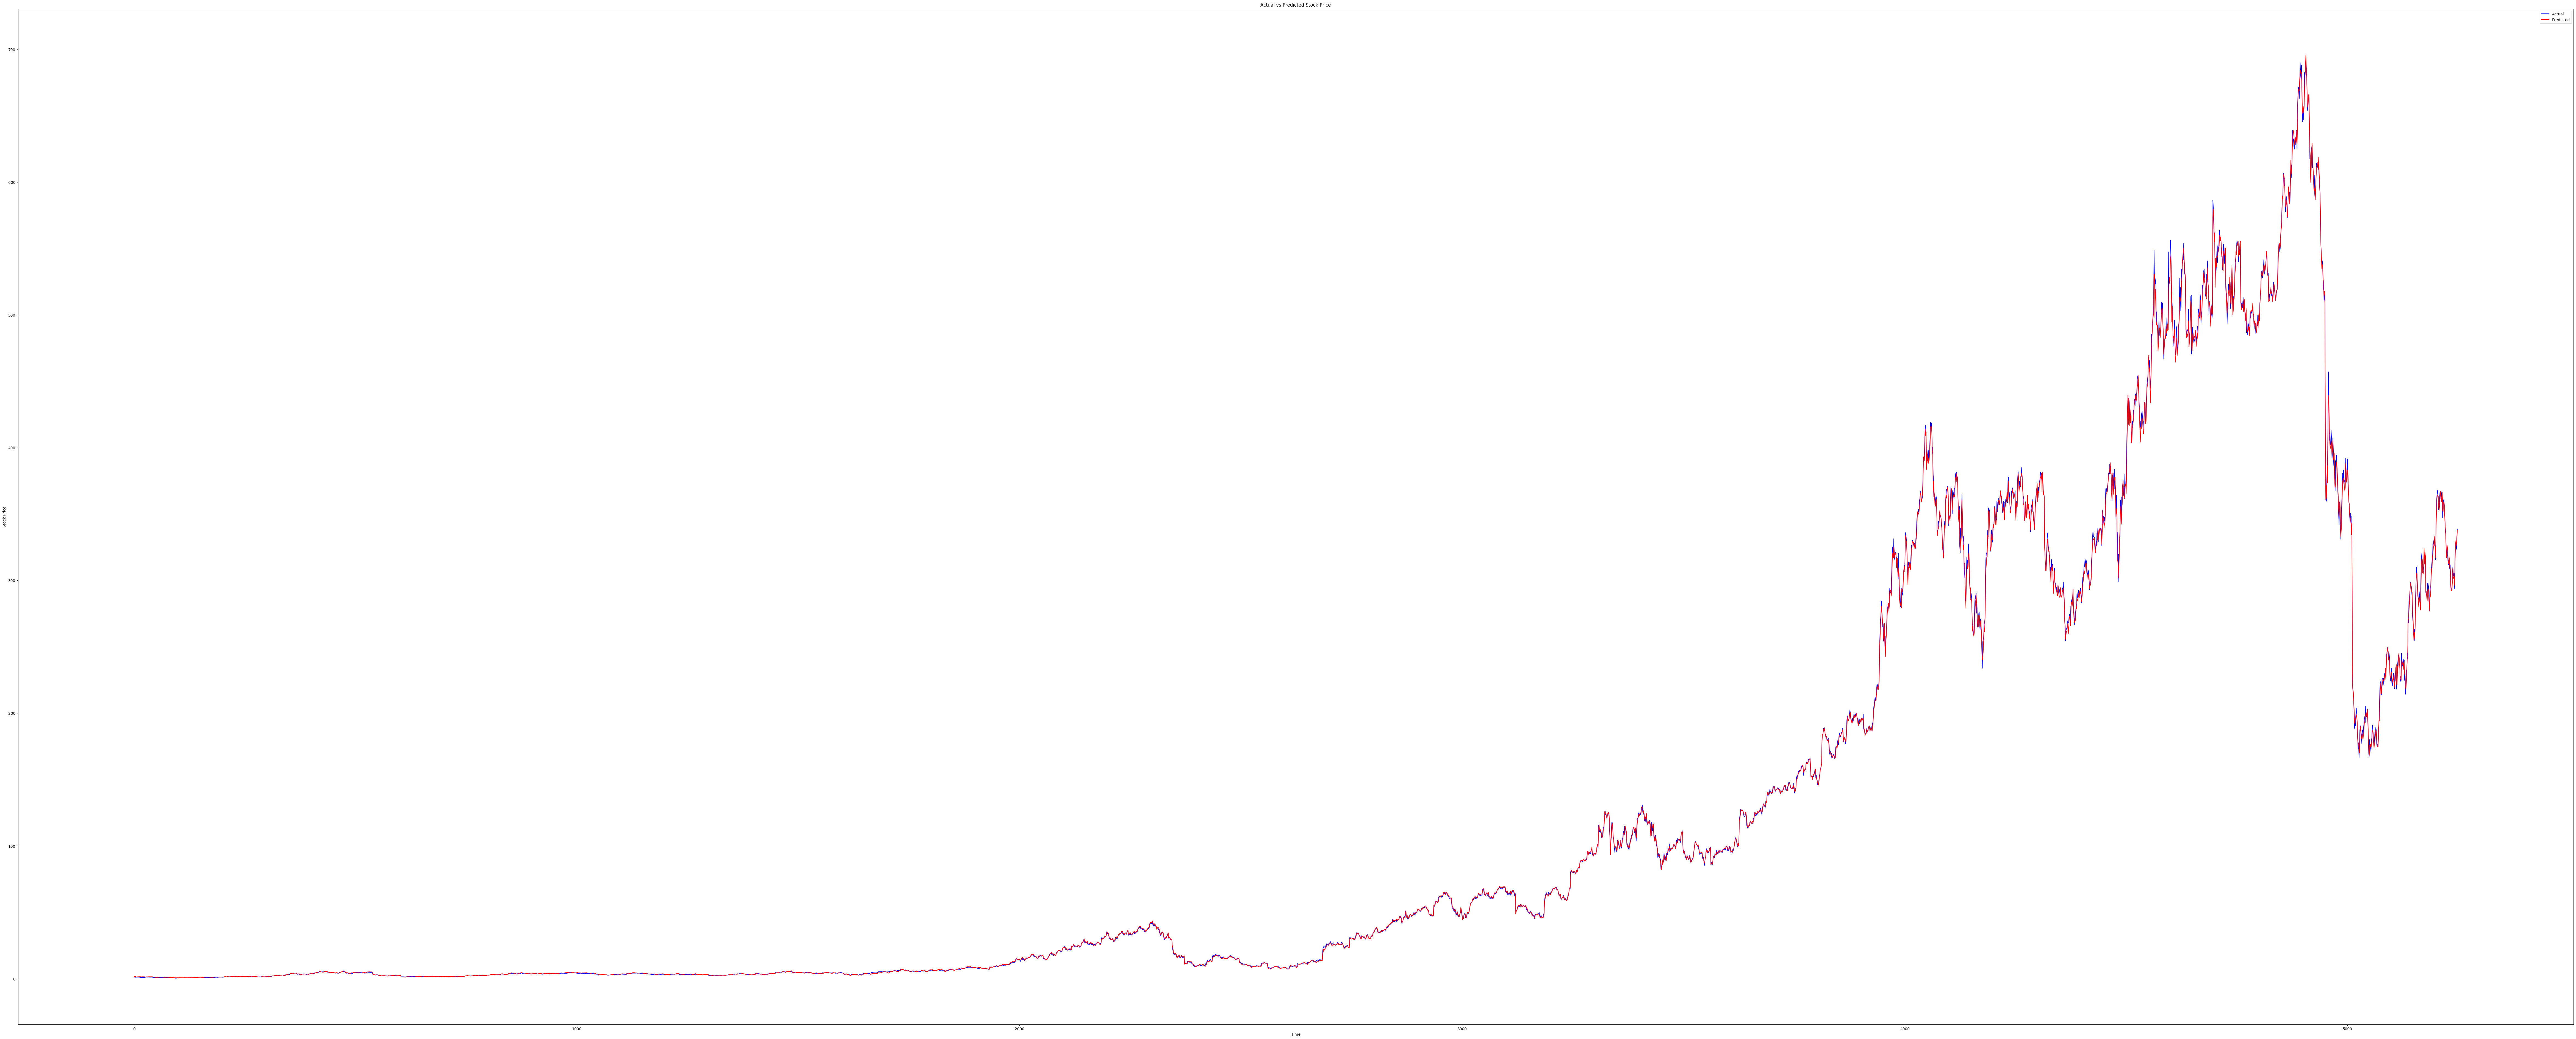

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(120,48))
plt.plot(PY['Close'], color='blue', label='Actual')
plt.plot(predicted_prices, color='red', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

plt.show()